##     COURSE: Linear algebra: theory and implementation
###    SECTION: Quadratic Form

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import linalg

#### 161/162. Quadratic Form in Algebra/Geometry

In [2]:
# matrix and vector
S = [ [ 1,  3, -2], 
      [ 0,  3,  4],
      [-5, -2,  4] ]

w = np.transpose([ [-2, 4, 3] ]) # a column vector

# compute the quadratic form
qf = w.T@S@w

print(qf)
print(w)
print(w.shape)

[[130]]
[[-2]
 [ 4]
 [ 3]]
(3, 1)


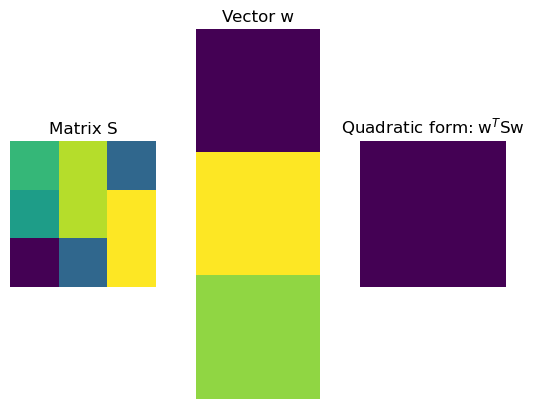

In [3]:
n = len(w) # used for plotting

# show the matrices
plt.subplot(1,3,1)
plt.imshow(S)
plt.axis('off')
plt.title('Matrix S')

plt.subplot(1,3,2)
plt.imshow(w)
plt.axis('off')
plt.title('Vector w')

plt.subplot(1,3,3)
plt.imshow(qf)
plt.title('Quadratic form: w$^T$Sw')
plt.axis('off')

plt.show()

- n*n matrix will have n+1 dimensional qf surface

In [8]:
# some different matrices
S = np.zeros((4,),dtype=object)

S[0] = [ [ 4, 4], [4, 9] ]
S[1] = [ [-4,-1], [3,-5] ]
S[2] = [ [ 0, 1], [2, 0] ]
S[3] = [ [ 1, 1], [1, 1] ]

print(S.shape)
print(S)

# range for vector w
n = 30
wRange = np.linspace(-2,2,n)
print(wRange)

(4,)
[list([[4, 4], [4, 9]]) list([[-4, -1], [3, -5]]) list([[0, 1], [2, 0]])
 list([[1, 1], [1, 1]])]
[-2.         -1.86206897 -1.72413793 -1.5862069  -1.44827586 -1.31034483
 -1.17241379 -1.03448276 -0.89655172 -0.75862069 -0.62068966 -0.48275862
 -0.34482759 -0.20689655 -0.06896552  0.06896552  0.20689655  0.34482759
  0.48275862  0.62068966  0.75862069  0.89655172  1.03448276  1.17241379
  1.31034483  1.44827586  1.5862069   1.72413793  1.86206897  2.        ]


[-2.         -1.86206897 -1.72413793 -1.5862069  -1.44827586 -1.31034483
 -1.17241379 -1.03448276 -0.89655172 -0.75862069 -0.62068966 -0.48275862
 -0.34482759 -0.20689655 -0.06896552  0.06896552  0.20689655  0.34482759
  0.48275862  0.62068966  0.75862069  0.89655172  1.03448276  1.17241379
  1.31034483  1.44827586  1.5862069   1.72413793  1.86206897  2.        ]


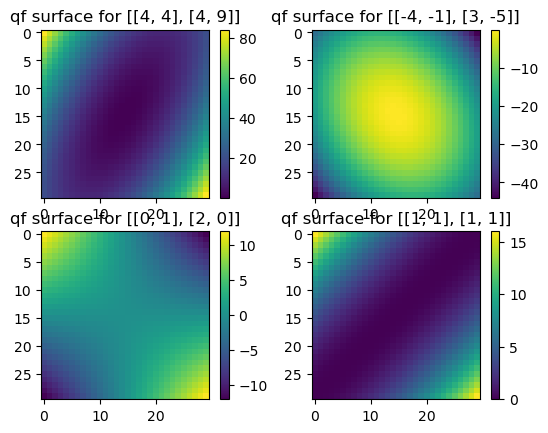

In [ ]:



# initialize quadratic form matrix
qf = np.zeros( (n,n) )

for i in range(4):
    
    # compute QF
    for xi in range(n):
        for yi in range(n):
            # column vector w
            w = np.transpose([ wRange[xi], wRange[yi] ])
            
            # QF
            qf[xi,yi] = w.T@S[i]@w
    
    # show the map
    plt.subplot(2,2,i+1)
    plt.imshow(qf)
    plt.title('qf surface for {}'.format(S[i]))
    plt.colorbar()

plt.show()

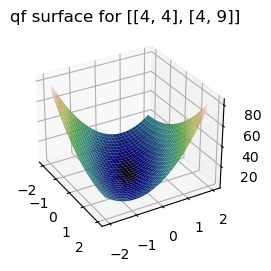

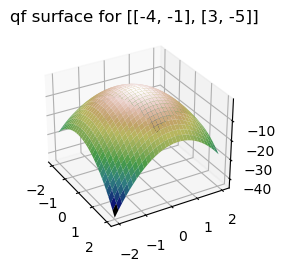

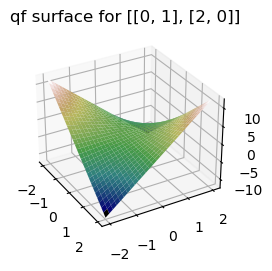

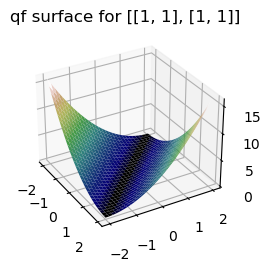

In [9]:
# 3D plotting code

mycmap = plt.get_cmap('gist_earth')
X,Y = np.meshgrid(wRange,wRange)

for i in range(4):
    
    for xi in range(n):
        for yi in range(n):
            w = np.array([ wRange[xi], wRange[yi] ])
            qf[xi,yi] = w.T@S[i]@w
    
    # show the map 
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(221+i, projection='3d')
    ax1.set_title('qf surface for {}'.format(S[i]))
    surf1 = ax1.plot_surface(X, Y, qf.T, cmap=mycmap)
    ax1.view_init(azim=-30, elev=30)

plt.show()

#### 163. Normalized quadratic form

- argmax {qf(w,S)/w.T@w}, qf over the norm of w
- ax^2+(b+c)xy + dy^2 / x^2+y^2
- to find energy max/min through ridges

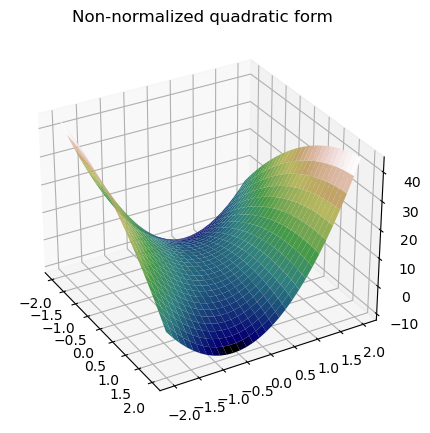

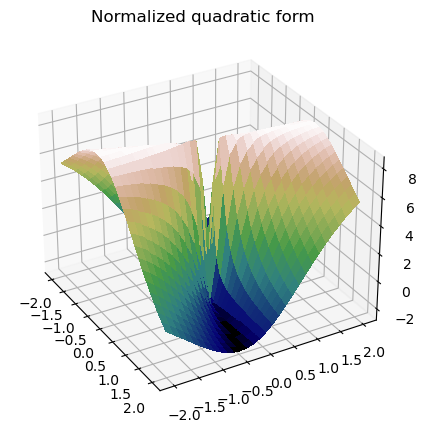

In [10]:
A = np.array([[-2,3],[2,8]])

n = 30
wRange = np.linspace(-2,2,n)

# for the visualization
X,Y = np.meshgrid(wRange,wRange)

# initialize qf and qfN matrix
qf  = np.zeros((n,n))
qfN = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        
        # create x (coordinate) vector
        x = np.transpose([ wRange[i],wRange[j] ])

        # compute the quadratic forms
        qf[i,j]  = x.T@A@x
        qfN[i,j] = qf[i,j] / (x.T@x)


fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(X, Y, qf.T, cmap=mycmap)
ax1.view_init(azim=-30, elev=30)
ax1.set_title('Non-normalized quadratic form')

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(X, Y, qfN.T, cmap=mycmap, antialiased=False)
ax1.view_init(azim=-30, elev=30)
ax1.set_title('Normalized quadratic form')

plt.show()

#### 165. eigenvectors and geometry of qf surface: for symmetric matrix

- for symmetric matrix: eigenvectors are along the ridges of qf surface min/max 

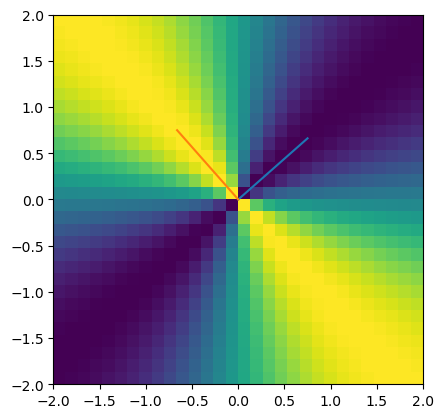

In [28]:
# a symmetric matrix
A = [ [34,4],[4,33] ]

# range for vector w
n = 30
wRange = np.linspace(-2,2,n)

# initialize quadratic form matrix
qf = np.zeros( (n,n) )

# compute QF
for xi in range(n):
    for yi in range(n):
        # this w
        w = np.transpose([ wRange[xi], wRange[yi] ])

        # QF
        qf[xi,yi] = w.T@A@w / (w.T@w)


# compute eigendecomposition
D,V = np.linalg.eig(A)

# show the surface
plt.imshow(qf,extent=[-2,2,-2,2])

# show the eigenvectors
plt.plot( [0,V[0,0]],[0,V[1,0]]  )
plt.plot( [0,V[0,1]],[0,V[1,1]]  )
plt.show()


#### 166. one application of Normalized quadratic form: PCA

- **about data**: made-up business enviroment description for 1000 locations, including # of restaurants/retail stores/schools,  distance to nearest mall and property occurancy rate
- these features are a subset of features to build a ML model
- therefore, I'll use PCA to reduce dimension of features

In [31]:
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of records (properties)
n_records = 1000

# Generate synthetic features describing the business environment
# Feature 1: Number of restaurants within 1 mile (Poisson distribution, mean ~15)
restaurants = np.random.poisson(lam=15, size=n_records)

# Feature 2: Number of retail stores within 1 mile (Poisson distribution, mean ~10)
retail_stores = np.random.poisson(lam=10, size=n_records)

# Feature 3: Distance to the nearest shopping mall (Normal distribution, mean ~3 miles, std ~1 mile)
mall_distance = np.abs(np.random.normal(loc=3, scale=1, size=n_records))

# Feature 4: Number of schools within 1 mile (Poisson distribution, mean ~5)
schools = np.random.poisson(lam=5, size=n_records)

# Feature 5: Average property occupancy rate of nearby businesses (Uniform distribution, 0.5 to 1.0)
occupancy_rate = np.random.uniform(low=0.5, high=1.0, size=n_records)

# Combine all features into a DataFrame
data = pd.DataFrame({
    'Restaurants': restaurants,
    'Retail_Stores': retail_stores,
    'Mall_Distance': mall_distance,
    'Schools': schools,
    'Occupancy_Rate': occupancy_rate
})

# Display first few rows
data.head()

,Restaurants,Retail_Stores,Mall_Distance,Schools,Occupancy_Rate
0,18,10,1.901380,7,0.857344
1,10,11,4.420504,2,0.763650
2,16,7,2.886519,5,0.950434
3,19,10,3.221558,9,0.656473
4,11,6,4.234752,3,0.787081


A few steps to calculate principle component and variance explained:
1. standardize data
2. calculate Covariance matrix
3. compute Eigendecomposition on Cov matrix
4. compute principle component and variance explained
   
Since I made up data from random distribution, the variance explained by the first few components is not significant.

[0.21479131 0.20592851 0.20224486 0.19279961 0.1842357 ]


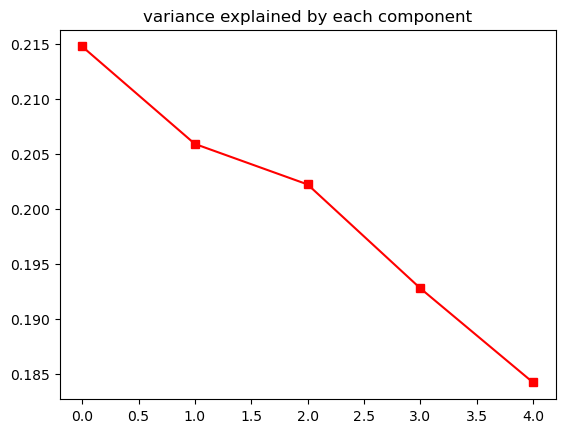

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [60]:
# 1. standardize data (also centered)
mean = data.mean()
std = data.std()

standardized_data = (data-mean)/std
standardized_data.head()

# 2. compute covariance matrix
n=5
cov = np.array(standardized_data).T@np.array(standardized_data) / (n-1)
# print(cov)

# 3. eigendecomposition on cov
D,V = np.linalg.eig(cov)

# sort eigenvalues
idx = np.argsort(D)[::-1]
V_sorted = V[:,idx]
# print(D)
# print(idx)
# print(V)
# print(V_sorted)

# plot variance explained
var = D[idx]/np.sum(D)
print(var)
plt.plot(var, 'rs-')
plt.title('variance explained by each component')
plt.show()

# 4. compute the first 2 principle components into a new table
r = 2
pc = data@V_sorted[:,:r]
pc.info()

#### 167. Quadratic form of generalized eigendecomposition

In [61]:
# create two symmetric matrices
m = 14
n = 1000

# create A as random sine-modulated noise, then its covariance matrix
A = np.zeros((m,n))
for i in range(n):
    A[:,i] = np.random.randn(m) * np.cos(np.linspace(0,np.pi,m))

A = A@A.T


# B is the same thing, just different random numbers
B = np.zeros((m,n))
for i in range(n):
    B[:,i] = np.random.randn(m) * np.cos(np.linspace(0,np.pi,m))

B = B@B.T


# generalized eigendecomposition
evals,evecs = linalg.eigh(A,B)

C:\Users\elisa\AppData\Local\Temp\ipykernel_23528\796102637.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


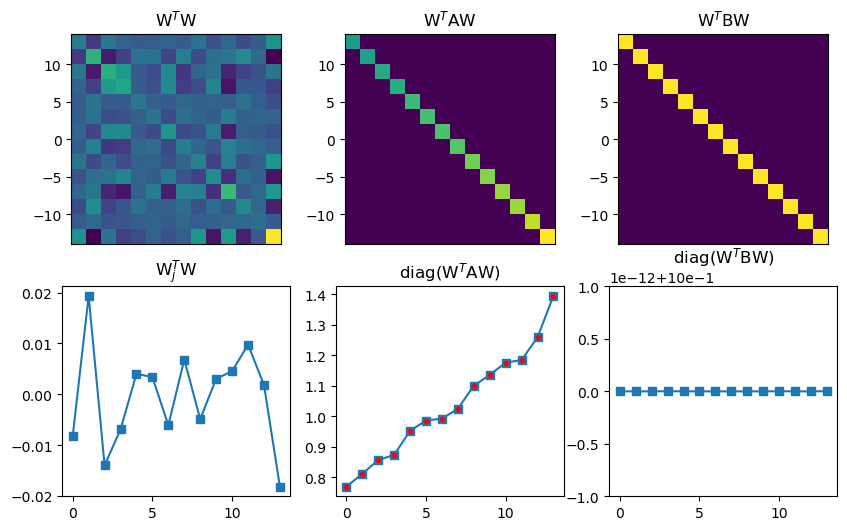

In [62]:
## some plotting

fig = plt.subplots(1,figsize=(10,6))

# W'W
plt.subplot(231)
plt.imshow(evecs.T@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W$^T$W')

# one row of W'W
tmp = evecs.T@evecs
plt.subplot(234)
plt.plot(tmp[1,:],'s-')
plt.title('W$_j^T$W')

# W'AW
plt.subplot(232)
plt.imshow(evecs.T@A@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W$^T$AW')

# one row of W'AW
plt.subplot(235)
plt.plot(np.diag(evecs.T@A@evecs),'s-')
plt.plot(evals,'r.')
plt.title('diag(W$^T$AW)')

# W'BW
plt.subplot(233)
plt.imshow(evecs.T@B@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W$^T$BW')

# diagonal of W'BW
plt.subplot(236)
plt.plot(np.diag(evecs.T@B@evecs),'s-')
plt.title('diag(W$^T$BW)')

plt.show()


#### 168. matrix definiteness, geometry and eigenvalues

C:\Users\elisa\AppData\Local\Temp\ipykernel_23528\2729252707.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.zeros((5,), dtype=np.object)
C:\Users\elisa\AppData\Local\Temp\ipykernel_23528\2729252707.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


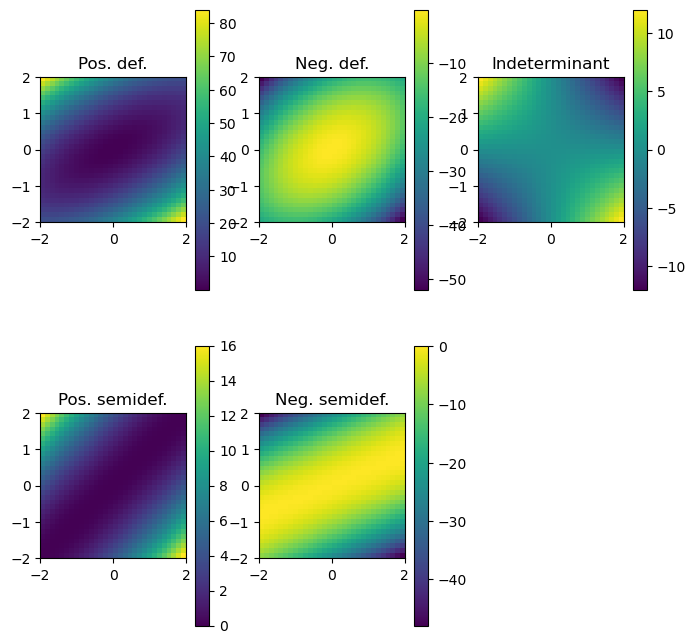

In [65]:
# some different matrices
S = np.zeros((5,), dtype=np.object)
S[0] = [ [ 4, 4], [ 4, 9] ]
S[1] = [ [-4,-1], [-3,-5] ]
S[2] = [ [ 0, 1], [ 2, 0] ]
S[3] = [ [ 1, 1], [ 1, 1] ]
S[4] = [ [-1,-2], [-3,-6] ]

# range for vector w
n = 30
wr = 2
wRange = np.linspace(-wr,wr,n)

# initialize quadratic form matrix
qf = np.zeros( (n,n) )

fig = plt.subplots(1,figsize=(8,8))

for i in range(5):
    
    # compute QF
    for xi in range(n):
        for yi in range(n):
            # this w
            w = np.transpose([ wRange[xi], wRange[yi] ])
            
            # QF
            qf[xi,yi] = w.T@S[i]@w
    
    # show the map
    plt.subplot(2,3,i+1)
    plt.imshow(qf.T,extent=[-wr,wr,-wr,wr])
    plt.colorbar()
    
    ## compute the matrix's definiteness based on the eigenvalues
    
    # get eigenvalues
    evals = np.linalg.eig(S[i])[0]
    
    # we care about their signs
    esign = np.sign(evals)
    
    # test for signs (note: this test is valid only for 2x2 matrices!)
    if sum(esign)==2:
        defcat = 'Pos. def.'
    elif sum(esign)==1:
        defcat = 'Pos. semidef.'
    elif sum(esign)==0:
        defcat = 'Indeterminant'
    elif sum(esign)==-1:
        defcat = 'Neg. semidef.'
    elif sum(esign)==-2:
        defcat = 'Neg. def.'
    
    # add title
    plt.title(defcat)

plt.show()